/var/folders/g7/5jmy8ck90w1gy169l9s4h2r00000gn/T/ipykernel_67262/2900864689.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


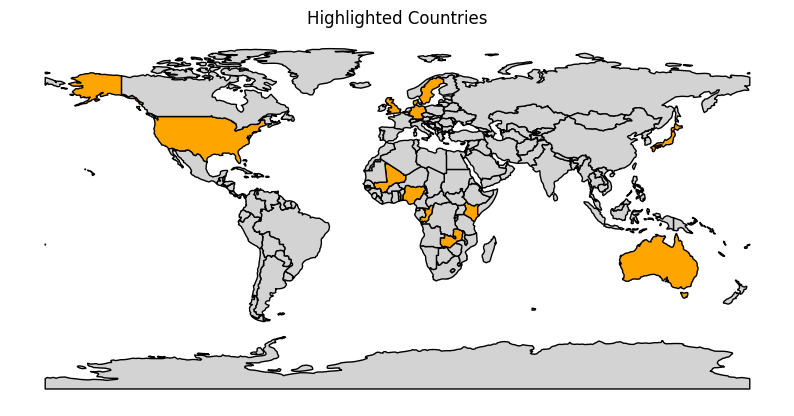

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# List of countries to highlight
highlight_countries = ['Denmark', 'Japan', 'Sweden', 'Holland', 'United States of America', 'Germany', 'United Kingdom', 'Mali', 'Belgium', 'Zambia', 'Kenya', 'Congo', 'Nigeria', 'Australia' ]

# Set up a condition to check if a country should be highlighted
world['highlight'] = world['name'].apply(lambda x: x in highlight_countries)

# Plot the world map with highlighted countries
fig, ax = plt.subplots(figsize=(10, 6))
world[world['highlight'] == True].plot(ax=ax, color='orange', edgecolor='black')
world[world['highlight'] == False].plot(ax=ax, color='lightgrey', edgecolor='black')

plt.title('Highlighted Countries')
plt.axis('off')
plt.show()


In [7]:
import folium
import pandas as pd

# List of countries to highlight
highlight_countries = ['Denmark', 'Japan', 'Sweden', 'Holland', 'United States of America', 'Germany', 'United Kingdom', 'Mali', 'Belgium', 'Zambia', 'Kenya', 'Congo', 'Nigeria', 'Australia' ]

# Read GeoJSON data of world countries
world_geojson = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Coordinates for Roskilde, Denmark
roskilde_coords = [55.6415, 12.0803]

# Create a map centered around Roskilde, Denmark
m = folium.Map(location=roskilde_coords, zoom_start=5)

# HTML content for the popup
popup_html = """
<h4 style="text-align:center;">Roskilde Festival</h4>
<img src="https://www.roskilde-festival.dk/media/5690/230630001018-t1923-med.jpg?focal=0.5,0.5&mode=crop&width=1200&height=630&quality=80" alt="Roskilde Festival Image" style="max-width:100%;height:auto;">
<p>The Roskilde Festival is a Danish music festival held annually south of Roskilde. It is one of the largest music festivals in Europe and the largest in the Nordic countries. It was created in 1971 by two high school students and a promoter.</p>
"""

# Create a custom icon for the marker
custom_icon = folium.CustomIcon(
    icon_image='https://d3acja3ybn8ixf.cloudfront.net/skyfish-public-page/logos/roskildefestival_1433163990.png',  # URL to the custom icon image
    icon_size=(40, 40)  # Adjust the size as needed
)

# Add a marker for Roskilde
folium.Marker(
    location=roskilde_coords,
    popup=folium.Popup(popup_html, max_width=300),  # You can adjust the max_width as needed
    icon=custom_icon
).add_to(m)

# Add GeoJSON layer to the map
folium.GeoJson(
    world_geojson,
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'orange' if feature['properties']['name'] in highlight_countries else 'lightgrey',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    },
    highlight_function=lambda x: {'weight': 3, 'fillOpacity': 1},
    smooth_factor=2.0
).add_to(m)

# Display the map
m
m.save('folium_map.html')
